In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#To avoid warning messages
import warnings

In [2]:

df_feature = pd.read_csv('feature_frames.csv')

In [3]:
for column in df_feature.select_dtypes(include=[np.number]).columns:
    mode_value = df_feature[column].mode().iloc[0]
    count_mode = df_feature[column].value_counts().iloc[0]
    total_values = df_feature[column].count() # Ignora NaN para el total
    frequency = count_mode / total_values
    print(f"Columna: {column}, Valor más repetido: {mode_value}, Frecuencia: {frequency:.2f} ({count_mode}/{total_values})")

Columna: variant_id, Valor más repetido: 33615294398596, Frecuencia: 0.00 (3446/2880549)
Columna: order_id, Valor más repetido: 3642856079492, Frecuencia: 0.00 (976/2880549)
Columna: user_id, Valor más repetido: 3437823688836, Frecuencia: 0.00 (12649/2880549)
Columna: user_order_seq, Valor más repetido: 2, Frecuencia: 0.50 (1430901/2880549)
Columna: outcome, Valor más repetido: 0.0, Frecuencia: 0.99 (2847317/2880549)
Columna: ordered_before, Valor más repetido: 0.0, Frecuencia: 0.98 (2819658/2880549)
Columna: abandoned_before, Valor más repetido: 0.0, Frecuencia: 1.00 (2878794/2880549)
Columna: active_snoozed, Valor más repetido: 0.0, Frecuencia: 1.00 (2873952/2880549)
Columna: set_as_regular, Valor más repetido: 0.0, Frecuencia: 1.00 (2870093/2880549)
Columna: normalised_price, Valor más repetido: 0.0810517755489292, Frecuencia: 0.05 (130754/2880549)
Columna: discount_pct, Valor más repetido: 0.0380622837370241, Frecuencia: 0.01 (41352/2880549)
Columna: global_popularity, Valor más re

In [4]:
df_feature.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [5]:
df_feature.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [6]:
df_feature.describe()

,variant_id,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,...,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,...,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00
min,3.361529e+13,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01


In [7]:

'''
numerical_cols = ['count_adults', 'count_children', 'count_babies', 'count_pets', 'avg_days_to_buy_product_type']
outcome_exists = 'outcome' in df_feature.columns 

if outcome_exists:
    cols = 3
    rows = int(np.ceil(len(numerical_cols) / cols))
    fig, ax = plt.subplots(rows, cols, figsize=(20, 5*rows))
    ax = ax.flatten()

    for i, col in enumerate(numerical_cols):
        sns.kdeplot(df_feature.loc[lambda x: x.outcome == 0, col], label='0', ax=ax[i])
        sns.kdeplot(df_feature.loc[lambda x: x.outcome == 1, col], label='1', ax=ax[i])
        ax[i].set_title(col)

    ax[0].legend()

    plt.tight_layout()
else:
    print("The 'outcome' column does not exist in the dataframe.")
'''

SyntaxError: incomplete input (1551054410.py, line 1)

In [ ]:


# Calcula las frecuencias de las categorías
freq_product_type = df_feature['product_type'].value_counts() / len(df_feature)
freq_vendor = df_feature['vendor'].value_counts() / len(df_feature)

# Mapea las frecuencias a las columnas originales
df_feature['product_type'] = df_feature['product_type'].map(freq_product_type)
df_feature['vendor'] = df_feature['vendor'].map(freq_vendor)


In [ ]:
df_feature.head

<bound method NDFrame.head of              variant_id  product_type       order_id        user_id  \
0        33826472919172      0.044470  2807985930372  3482464092292   
1        33826472919172      0.044470  2808027644036  3466586718340   
2        33826472919172      0.044470  2808099078276  3481384026244   
3        33826472919172      0.044470  2808393957508  3291363377284   
4        33826472919172      0.044470  2808429314180  3537167515780   
...                 ...           ...            ...            ...   
2880544  33826439594116      0.007178  3643254800516  3893722808452   
2880545  33826439594116      0.007178  3643274788996  3883757174916   
2880546  33826439594116      0.007178  3643283734660  3874925314180   
2880547  33826439594116      0.007178  3643294515332  3906490826884   
2880548  33826439594116      0.007178  3643301986436  3914253959300   

                  created_at           order_date  user_order_seq  outcome  \
0        2020-10-05 16:46:19  2020-10-0

In [ ]:

order_counts = df_feature['order_id'].value_counts()
orders_to_keep = order_counts[order_counts >= 5].index

df_filtered = df_feature[df_feature['order_id'].isin(orders_to_keep)]

In [16]:
import pandas as pd


df_feature['order_date'] = pd.to_datetime(df_feature['order_date'])
df_feature['created_at'] = pd.to_datetime(df_feature['created_at'])

df_feature['order_year'] = df_feature['order_date'].dt.year
df_feature['order_month'] = df_feature['order_date'].dt.month
df_feature['order_day'] = df_feature['order_date'].dt.day


df_feature['created_hour'] = df_feature['created_at'].dt.hour

#día de la semana o si es fin de semana
df_feature['order_dayofweek'] = df_feature['order_date'].dt.dayofweek
df_feature['order_is_weekend'] = df_feature['order_date'].dt.dayofweek >= 5


df_feature.drop(['order_date', 'created_at'], axis=1, inplace=True)

In [17]:
print(df_feature.shape)
df_feature.describe()

(2880549, 31)


,variant_id,product_type,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,...,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type,order_year,order_month,order_day,created_hour,order_dayofweek
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.762532e-02,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,...,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01,2.020684e+03,4.696157e+00,1.549961e+01,1.424203e+01,2.905320e+00
std,2.786246e+11,1.874006e-02,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,...,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00,4.649840e-01,4.523839e+00,8.743562e+00,4.741962e+00,2.028230e+00
min,3.361529e+13,9.095488e-04,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.380354e+13,1.575429e-02,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01,2.020000e+03,1.000000e+00,8.000000e+00,1.100000e+01,1.000000e+00
50%,3.397325e+13,2.015866e-02,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01,2.021000e+03,2.000000e+00,1.600000e+01,1.400000e+01,3.000000e+00
75%,3.428495e+13,3.826875e-02,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01,2.021000e+03,1.100000e+01,2.300000e+01,1.800000e+01,5.000000e+00
max,3.454300e+13,7.862182e-02,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01,2.021000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00


In [18]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit


''' Realiza la división manteniendo 'user_id' o 'order_id' agrupados'''

group_column = 'user_id'
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)


for train_idx, test_idx in gss.split(df_feature, groups=df_feature[group_column]):
    train_val = df_feature.iloc[train_idx]
    test = df_feature.iloc[test_idx]

# Elimina la columna 'outcome' para obtener X_train_val y X_test
X_train_val = train_val.drop('outcome', axis=1).values
X_test = test.drop('outcome', axis=1).values
y_train_val = train_val['outcome'].values
y_test = test['outcome'].values

# Ahora divide train_val en train y val
train_val_gss = GroupShuffleSplit(n_splits=1, train_size=(5/7), test_size=(2/7), random_state=42)

for train_idx, val_idx in train_val_gss.split(train_val, groups=train_val[group_column]):
    train = train_val.iloc[train_idx]
    val = train_val.iloc[val_idx]

# Finalmente, elimina la columna 'outcome' para obtener X_train, X_val y sus respectivos y
X_train = train.drop('outcome', axis=1).values
X_val = val.drop('outcome', axis=1).values
y_train = train['outcome'].values
y_val = val['outcome'].values

# Ahora puedes eliminar la columna 'outcome' de df_feature si fue añadida solo para la división
df_feature.drop('outcome', axis=1, inplace=True)

In [19]:
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape)  

print(y_train.shape)  
print(y_val.shape)  
print(y_test.shape)  
  

(1446128, 30)
(568780, 30)
(865641, 30)
(1446128,)
(568780,)
(865641,)


Ahora tenemos train, val y test sin leakage de 'user_id' o 'order_id' , si agrupamos por user, eso engloba order id , puesto q en la misma orden el user es el mismo


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Normalizar solo las columnas que no son cíclicas o no numéricas
X_train_s = scaler.fit_transform(X_train)
X_val_s= scaler.transform(X_val)
X_test_s= scaler.transform(X_test)

In [21]:
import numpy as np


print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))
print('\nVALIDATION SET')
print('Mean of each feature: ', np.round(np.mean(X_val_s,0),2))
print('Std of each feature: ', np.round(np.std(X_val_s,0),2))
print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [-0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

VALIDATION SET
Mean of each feature:  [ 0.01 -0.    0.07  0.13 -0.14 -0.02 -0.01 -0.03  0.01  0.   -0.   -0.
 -0.   -0.05 -0.1  -0.08  0.02 -0.11  0.   -0.01 -0.01  0.01 -0.01 -0.01
  0.06 -0.04 -0.08 -0.   -0.05 -0.04]
Std of each feature:  [1.01 1.   1.07 0.87 0.66 0.95 0.81 0.69 1.07 1.   1.   1.   1.   0.53
 0.71 0.   1.29 0.65 0.96 1.   1.   0.97 1.01 1.01 0.98 0.98 1.01 1.04
 1.01 0.98]

TEST SET
Mean of each feature:  [ 0.   -0.   -0.01  0.07  0.03  0.02  0.    0.01  0.    0.    0.   -0.
 -0.   -0.12 -0.09 -0.08 -0.01 -0.13  0.01 -0.   -0.    0.   -0.   -0.
  0.03 -0.03 -0.08 -0.03 -0.05 -0.03]
Std of each feature:  [1.   1.   0.98 0.91 1.14 1.05 1.02 1.09 1.03 1.   1.   1.   1.   0.55
 0.76 0.   1.31 0.57 1.

97.44
97.18
Precision: 0.1713187126174879
recall: 0.34273504273504274


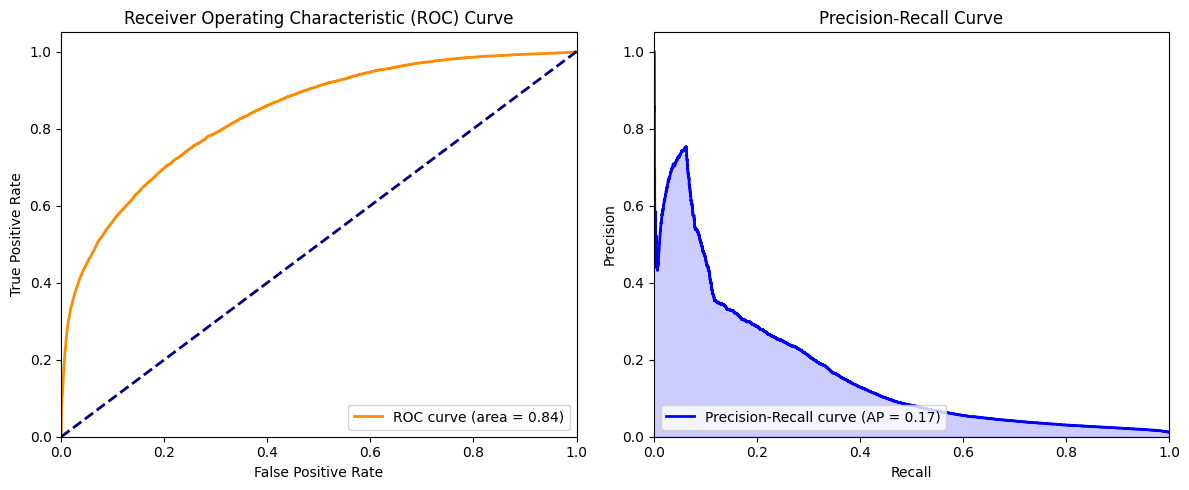

In [35]:
#YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score
import matplotlib.pyplot as plt


lda = LinearDiscriminantAnalysis()
lda.fit(X_train_s, y_train)
predict_LDA = lda.predict(X_test_s)
Score_LDA_train = lda.score(X_train_s, y_train)
LDA_score = lda.score(X_test_s, y_test)


precision = precision_score(y_test, predict_LDA)
recall = recall_score(y_test, predict_LDA)


print(round(Score_LDA_train*100,2))
print(round(LDA_score*100,2))
print(f'Precision: {precision}')
print(f'recall: {recall}')

y_scores_lda = lda.decision_function(X_test_s)


fpr, tpr, _ = roc_curve(y_test, y_scores_lda)
roc_auc = auc(fpr, tpr)


precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_scores_lda)
average_precision = average_precision_score(y_test, y_scores_lda)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()



solo con ver que la accuraccy del entrenamiento no es 100 se ve q este modelo no va a ser bueno para nuestro caso



In [23]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val

penalty = (None, 'l2')
C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

l_penalty = len(penalty)
l_C = len(C)
results_lr = np.zeros((l_penalty, l_C))

for i in range(len(penalty)):
    for j in range(len(C)):
        penalty_k = penalty[i]
        C_k = C[j]
        lr = LogisticRegression(C=C_k, penalty=penalty_k, solver='lbfgs', max_iter=10000)
        lr.fit(X_train_s, y_train)
        y_pred = lr.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero
        results_lr[i][j] = error_tipo_1

print(results_lr)


/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/ve

[[0.00033793 0.00033793 0.00033793 0.00033793 0.00033793 0.00033793
  0.00033793]
 [0.00033615 0.00033793 0.00033793 0.00033793 0.00033793 0.00033793
  0.00033793]]


In [24]:
best_params_lr = np.max(results_lr)  # Buscamos valor max de la
pos = np.where(results_lr == best_params_lr)  # Buscamos su posición
best_penalty_index = pos[0][0]
best_C_index = pos[1][0]

print('The best penalty is: ', penalty[best_penalty_index])
print('The best C is: ', C[best_C_index])


The best penalty is:  None
The best C is:  0.01


In [25]:
from sklearn.metrics import precision_score, recall_score

lr_best = LogisticRegression(penalty='l2', C=0.1)
lr_best.fit(X_train_s, y_train)
y_lr_best = lr_best.predict(X_test_s)


precision = precision_score(y_test, y_lr_best)
recall = recall_score(y_test, y_lr_best)
Score_LR_train = lr_best.score(X_train_s, y_train)
LR_score = lr_best.score(X_test_s, y_test)

print(round(Score_LR_train*100,2))
print(round(LR_score*100,2))

print(f'Precision: {precision}')
print(f'Recall: {recall}')


98.92
98.82
Precision: 0.6539618856569709
Recall: 0.06191832858499525


el accuracy(score) es la leche porque pone un monton de 0s pero los unos se le da bastante mal


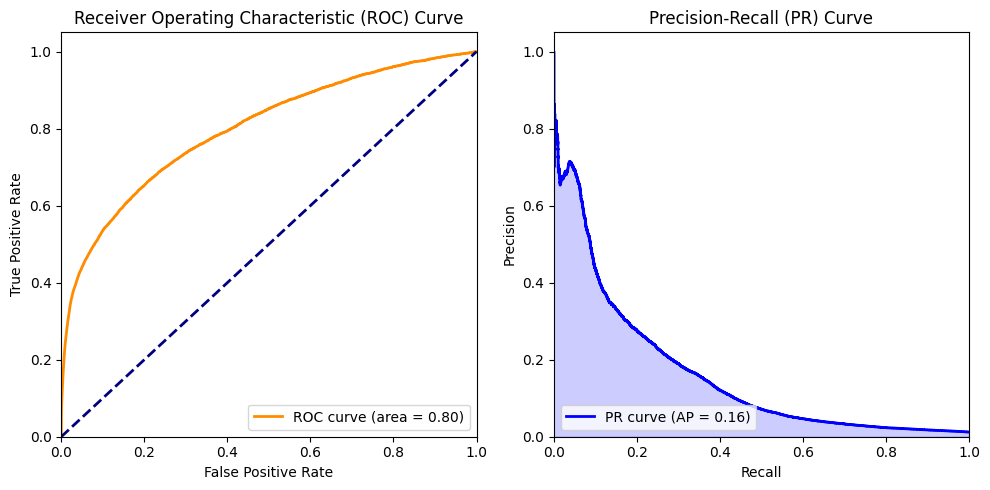

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model 'lr_best' and have 'X_test_s' and 'y_test'.

# Predict probabilities
y_proba_lr_best = lr_best.predict_proba(X_test_s)[:, 1]  # Probability estimates for the positive class

# Calculate the ROC curve points and the AUC score
fpr, tpr, _ = roc_curve(y_test, y_proba_lr_best)
roc_auc = auc(fpr, tpr)

# Calculate the precision-recall curve points and the average precision score
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr_best)
average_precision = average_precision_score(y_test, y_proba_lr_best)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Subplot for ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1, 2, 2)  # Subplot for Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


bastante mediocre

In [26]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val

n_neighbors = [1,5,10]
weights = ('uniform', 'distance')

l_n_neighbors = len(n_neighbors)
l_weights = len(weights)
results_knn = np.zeros((l_n_neighbors, l_weights))

for i in range(len(n_neighbors)):
    for j in range(len(weights)):
        n_neighbors_k = n_neighbors[i]
        weights_k = weights[j]
        knn = KNeighborsClassifier(n_neighbors=n_neighbors_k, weights=weights_k)
        knn.fit(X_train_s, y_train)
        y_pred = knn.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        # Error de Tipo I: FP / (FP + TN)
        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero
        results_knn[i][j] = error_tipo_1

print(results_knn)
'''

"\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val\n\nn_neighbors = [1,5,10]\nweights = ('uniform', 'distance')\n\nl_n_neighbors = len(n_neighbors)\nl_weights = len(weights)\nresults_knn = np.zeros((l_n_neighbors, l_weights))\n\nfor i in range(len(n_neighbors)):\n    for j in range(len(weights)):\n        n_neighbors_k = n_neighbors[i]\n        weights_k = weights[j]\n        knn = KNeighborsClassifier(n_neighbors=n_neighbors_k, weights=weights_k)\n        knn.fit(X_train_s, y_train)\n        y_pred = knn.predict(X_val_s)\n        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()\n        # Error de Tipo I: FP / (FP + TN)\n        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero\n        results_knn[i][j] = error_tipo_1\n\nprint(results_knn)\n"

me tardo como 3h en entrenar y los resultados no son muy buenos : 
[[0.00983022 0.00983022]
 [0.00113473 0.00174479]
 [0.00035572 0.00085905]]

De todas formas no es lineal asi q no voy a seguir


In [25]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val

parameters = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15, 20]
}

l_n_estimators = len(parameters['n_estimators'])
l_max_depth = len(parameters['max_depth'])
results_rf = np.zeros((l_n_estimators, l_max_depth))

for i, n_estimators in enumerate(parameters['n_estimators']):
    for j, max_depth in enumerate(parameters['max_depth']):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train_s, y_train)
        y_pred = rf.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        # Error de Tipo I: FP / (FP + TN)
        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero
        results_rf[i][j] = error_tipo_1

print(results_rf)
'''

[[2.84572945e-05 1.28057825e-04 2.82794364e-04 4.83774006e-04]
 [6.75860744e-05 1.19164921e-04 2.29436937e-04 3.50380438e-04]
 [4.44645226e-05 1.19164921e-04 1.68965186e-04 2.65008555e-04]
 [2.31215518e-05 1.17386340e-04 1.70743767e-04 2.38329841e-04]
 [2.13429709e-05 1.20943502e-04 1.68965186e-04 2.32994099e-04]]


[[2.84572945e-05 1.28057825e-04 2.82794364e-04 4.83774006e-04]
 [6.75860744e-05 1.19164921e-04 2.29436937e-04 3.50380438e-04]
 [4.44645226e-05 1.19164921e-04 1.68965186e-04 2.65008555e-04]
 [2.31215518e-05 1.17386340e-04 1.70743767e-04 2.38329841e-04]
 [2.13429709e-05 1.20943502e-04 1.68965186e-04 2.32994099e-04]]

In [5]:
import numpy as np

parameters = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15, 20]
}

results_rf = [
    [2.84572945e-05, 1.28057825e-04, 2.82794364e-04, 4.83774006e-04],
    [6.75860744e-05, 1.19164921e-04, 2.29463937e-04, 3.50830438e-04],
    [4.44645226e-05, 1.19164921e-04, 1.68965186e-04, 2.65008555e-04],
    [2.31215518e-05, 1.17386340e-04, 1.70743767e-04, 2.38329841e-04],
    [2.13429709e-05, 1.20943520e-04, 1.68965186e-04, 2.32994099e-04]
]

best_params_rf = np.max(results_rf)  # Buscamos valor max de la
pos = np.where(results_rf == best_params_rf)  # Buscamos su posición
best_n_estimators_index = pos[0][0]
best_depth_index = pos[1][0]

print('The best n_estimators is: ', parameters['n_estimators'][best_n_estimators_index])
print('The depth  is: ', parameters['max_depth'][best_depth_index])


The best n_estimators is:  10
The depth  is:  20


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import precision_score, recall_score


rf_model = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
y_test_predictions = rf_model.predict(X_test)

precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)


print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.6333333333333333
Recall: 0.07578347578347579


El recall es bastante malo


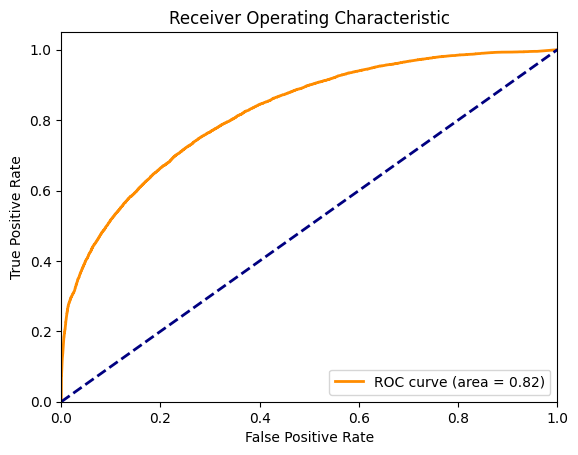

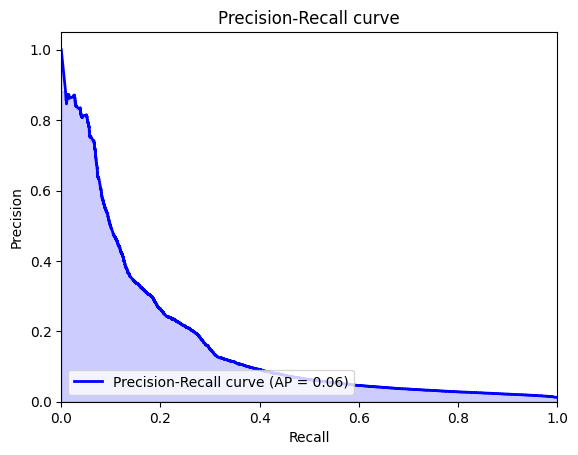

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming you have already trained your model and made predictions as per your previous code.

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, y_test_predictions)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


Nada interesante


Aunque se usan para regresion voy a probas a usar ridge y lasso a ver q sale

In [36]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Define hyperparameters for Ridge Regression
parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

n_alpha = len(parameters['alpha'])
results_ridge = np.zeros(n_alpha)

for i, alpha in enumerate(parameters['alpha']):
    ridge = RidgeClassifier(alpha=alpha, random_state=42)
    ridge.fit(X_train_s, y_train)
    y_pred = ridge.predict(X_val_s)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    # Calculate Type I Error: FP / (FP + TN)
    error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Avoid division by zero
    results_ridge[i] = error_tipo_1

print(results_ridge)

[0.00010138 0.00010138 0.00010138 0.00010138 0.00010138]


In [38]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score, recall_score

# Assuming you have already determined the best alpha for Ridge
best_alpha_ridge = 1  # replace with your best alpha

ridge_model = RidgeClassifier(alpha=best_alpha_ridge, random_state=42)
ridge_model.fit(X_train, y_train)
y_test_predictions_ridge = ridge_model.predict(X_test)

precision_ridge = precision_score(y_test, y_test_predictions_ridge)
recall_ridge = recall_score(y_test, y_test_predictions_ridge)

print(f"Ridge Precision: {precision_ridge}")
print(f"Ridge Recall: {recall_ridge}")


/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.95783e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Precision: 0.7233727810650887
Ridge Recall: 0.04643874643874644


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


ridge_decision_function = ridge_model.decision_function(X_test)

# Calculate ROC Curve for Ridge
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, ridge_decision_function)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

# Plot ROC Curve for Ridge
plt.figure(figsize=(10, 5))
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge ROC curve (area = {roc_auc_ridge:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ridge')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import numpy as np

# Define hyperparameters for Lasso Regression
parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

n_alpha = len(parameters['alpha'])
results_lasso = np.zeros(n_alpha)

for i, alpha in enumerate(parameters['alpha']):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train_s, y_train)
    y_pred = np.round(lasso.predict(X_val_s))  # Lasso predicts continuous values, so round to 0 or 1
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    # Calculate Type I Error: FP / (FP + TN)
    error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Avoid division by zero
    results_lasso[i] = error_tipo_1

print(results_lasso)


[0. 0. 0. 0. 0.]
